In [3]:
import pandas as pd

In [30]:
df = pd.read_parquet("/kaggle/input/data-inference/data_hasil_inferensi_parquet.parquet")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   category                       355 non-null    object
 1   news_text                      355 non-null    object
 2   summary_text                   355 non-null    object
 3   __index_level_0__              355 non-null    int64 
 4   model_finetune_generated       355 non-null    object
 5   model_base_generated           355 non-null    object
 6   model_base_zeroshot_generated  355 non-null    object
 7   model_finetune172_generated    355 non-null    object
dtypes: int64(1), object(7)
memory usage: 22.3+ KB


In [23]:
column_summary = ['summary_text',  'model_finetune_generated', 'model_base_generated', 'model_base_zeroshot_generated', 'model_finetune172_generated']

In [15]:
for i in df.iloc[1]:
    print(i)
    print("-"*25)

hiburan
-------------------------
Jakarta , CNN Indonesia - - Sebuah lagu misterius mendadak muncul di iTunes akhir pekan lalu . Lagu itu berjudul Behind Me , disebut sebagai karya dari seorang artis tak terkenal bernama Guido Dos Santos . Lagu itu diperkenalkan ke iTunes tanpa keterangan apa pun , lalu dihapus . Namun Gay Times melaporkan , lagu itu sempat membuat tertarik banyak orang . Bahkan ia masuk daftar 50 besar lagu laris didengar di delapan negara , meski tak disebutkan mana saja . Mengutip Independent , lagu itu dipercaya merupakan versi demo dari karya Madonna yang berjudul Two Steps Behind Me . Itu merupakan demo yang direkam Madonna pada 2015 untuk album Rebel Heart . Saat itu Two Steps Behind Me disebut berkaitan dengan Lady Gaga . Namun manajer Madonna , Guy Oseary menolak gagasan itu . “ Lagu itu bukan tentang Gaga atau siapa pun , ” tulisnya di Twitter pada 2014 . Oseary maupun Madonna tidak berkata apa-apa tentang lagu pendek Behind Me yang baru muncul di iTunes . Al

In [31]:
import re

def extract_only_summary(text):
    """
    Menghapus bagian dari 'user' sampai 'model' (termasuk keduanya) dan hanya mengembalikan output model.
    Cocok jika seluruh isi (user prompt + model output) disimpan dalam satu string.
    """
    # Pola regex untuk menghapus bagian dari 'user' hingga 'model'
    pattern = re.compile(r"user.*?model\s*", re.DOTALL | re.IGNORECASE)
    cleaned_text = re.sub(pattern, "", text).strip()
    return cleaned_text


In [32]:
df["model_finetune_generated"] = df["model_finetune_generated"].apply(extract_only_summary)
df["model_base_generated"] = df["model_base_generated"].apply(extract_only_summary)
df["model_base_zeroshot_generated"] = df["model_base_zeroshot_generated"].apply(extract_only_summary)
df["model_finetune172_generated"] = df["model_finetune172_generated"].apply(extract_only_summary)


In [37]:
for i in df.iloc[0]:
    print(i)
    print("-"*25)

hiburan
-------------------------
Jakarta , CNN Indonesia - - Dilansir AFP , seorang warga Mesir yang dipercaya sebagai wanita terberat di dunia masuk sebuah rumah sakit di Abu Dhabi Kamis ( 5 / 5 ) , dimana ia akan melanjutkan perawatan setelah menjalankan operasi menurunkan badan di India . Eman Ahmed Abd El Aty memiliki berat badan mencapai 500 kilogram sebelum menjalankan operasi di Mumbai Maret lalu dimana ia mengurangi seperlima dari berat badannya . Ia menderita berbagai macam masalah kesehatan termasuk penyakit gajah , kondisi yang menyebabkan anggota badan membengkak . Abd El Aty diberi diet cairan khusus selama berada di India yang bertujuan menurunkan berat badan . Diet ini memungkinkan dokter melakukan operasi bariatrik , prosedur bypass yang kini sering dilakukan di India dalam menghadapi masalah obesitas yang bertambah banyak . Ia tiba di India dengan menggunakan pesawat Airbus yang secara khusus telah dimodifikasi khusus untuk mengangkutnya pada bulan Februari . Kini , b

In [26]:
df = df[column_summary]

In [27]:
!pip install evaluate
!pip install rouge_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=334423403f7220be6ecb3162caa7dfed6809f8ad03fc0ed1b5af81f0d680181c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [36]:
import evaluate

# Load metric rouge
rouge = evaluate.load("rouge")

from tqdm import tqdm
tqdm.pandas()

def compute_rouge_scores(prediction, reference):
    results = rouge.compute(predictions=[prediction], references=[reference])
    return (
        results["rouge1"],
        results["rouge2"],
        results["rougeL"]
    )


# Buat salinan DataFrame untuk menghindari warning
df = df.copy()

# Kolom-kolom summary yang ingin kamu evaluasi

# Hitung ROUGE per baris dengan tqdm progress bar
for col in column_summary:
    df[[f"{col}_rouge1", f"{col}_rouge2", f"{col}_rougeL"]] = df.progress_apply(
        lambda row: compute_rouge_scores(
            row[col], row["summary_text"]
        ),
        axis=1,
        result_type="expand"
    )

100%|██████████| 355/355 [06:58<00:00,  1.18s/it]


In [48]:
df[df['model_finetune_generated_rouge2'] == 0].head()

,category,news_text,summary_text,__index_level_0__,model_finetune_generated,model_base_generated,model_base_zeroshot_generated,model_finetune172_generated,summary_text_rouge1,summary_text_rouge2,...,model_finetune_generated_rougeL,model_base_generated_rouge1,model_base_generated_rouge2,model_base_generated_rougeL,model_base_zeroshot_generated_rouge1,model_base_zeroshot_generated_rouge2,model_base_zeroshot_generated_rougeL,model_finetune172_generated_rouge1,model_finetune172_generated_rouge2,model_finetune172_generated_rougeL
35,hiburan,"Bagi banyak orang terutama perempuan , selulit...",Selulit amat dibenci oleh kaum hawa karena dir...,443,,Berikut adalah ringkasan teks tersebut:\n\n**R...,Selulit merupakan masalah kulit yang umum dial...,Selulit merupakan masalah kulit yang dirasa cu...,1.0,1.0,...,0.000000,0.322148,0.108844,0.187919,0.344828,0.153846,0.275862,0.245283,0.038462,0.132075
46,hiburan,SKOTLANDIA– Perusahaan golf milik Donald Trump...,Perusahaan golf milik Donald Trump di Skotland...,568,,Berikut adalah ringkasan teks tersebut:\n\n**R...,Gugatan perdata yang diajukan oleh Rohan Beyts...,,1.0,1.0,...,0.000000,0.555556,0.352113,0.305556,0.465753,0.236111,0.260274,0.000000,0.000000,0.000000
50,hiburan,Merdeka.com - Punya bos dermawan yang suka mem...,Seorang pengusaha batu permata asal India bern...,602,. Kebun lainnya . Kebun baru ini . Kebun baru ...,Berikut ringkasan teks tersebut:\n\n**Ringkasa...,Pengacara kami yang berpengaruh dan terpercaya.,. Bos murah hati ini berjanji akan membagikan ...,1.0,1.0,...,0.028571,0.391304,0.147059,0.260870,0.057143,0.000000,0.057143,0.601399,0.539007,0.587413
51,hiburan,"Jakarta , CNN Indonesia - - Setelah kemunculan...","Memasuki pertengahan bulan Oktober , suasana H...",641,. . . . . . . . . . . . . . . . . . . . . . . ...,Berikut ringkasan teks tersebut:\n\n**Setelah ...,tengah tengah tengah tengah tengah tengah teng...,. Labu - labu kuning besar ini juga mulai kemb...,1.0,1.0,...,0.000000,0.378788,0.123077,0.257576,0.000000,0.000000,0.000000,0.403670,0.074766,0.220183
52,hiburan,Merdeka.com - Seperti yang sudah kamu tahu bah...,"Sebuah penelitian yang dilansir dari Boldsky ,...",665,prote primera kali yang membuat kamu terbiasat...,Berikut ringkasan teks tersebut:\n\nTeks terse...,**B**\n**a**\n**n**\n**a**\n**n**\n**a**\n**n*...,,1.0,1.0,...,0.088889,0.330579,0.117647,0.214876,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
print(df[df['model_finetune_generated_rouge2'] == 1]['summary_text'], )

63    Sekuat apapun Anda menyembunyikan rasa sakit ,...
Name: summary_text, dtype: object


In [44]:
print?

Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
Type:      builtin_function_or_method


In [45]:
df.describe()

,__index_level_0__,summary_text_rouge1,summary_text_rouge2,summary_text_rougeL,model_finetune_generated_rouge1,model_finetune_generated_rouge2,model_finetune_generated_rougeL,model_base_generated_rouge1,model_base_generated_rouge2,model_base_generated_rougeL,model_base_zeroshot_generated_rouge1,model_base_zeroshot_generated_rouge2,model_base_zeroshot_generated_rougeL,model_finetune172_generated_rouge1,model_finetune172_generated_rouge2,model_finetune172_generated_rougeL
count,355.000000,355.0,355.0,355.0,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,1857.836620,1.0,1.0,1.0,0.217369,0.161589,0.190609,0.185989,0.074283,0.126897,0.184130,0.070692,0.128745,0.348160,0.266200,0.307977
std,1064.749766,0.0,0.0,0.0,0.284611,0.254795,0.268824,0.178007,0.094140,0.128032,0.171686,0.094168,0.126987,0.296551,0.278759,0.289758
min,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,949.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1825.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.175676,0.031008,0.122807,0.200000,0.030769,0.135593,0.336134,0.178862,0.235294
75%,2797.000000,1.0,1.0,1.0,0.426448,0.272466,0.344545,0.340438,0.126984,0.219423,0.324948,0.122628,0.218400,0.591304,0.492655,0.532998
max,3734.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,0.583942,0.420664,0.521127,0.715328,0.666667,0.700730,0.991597,0.974359,0.991597


In [59]:
df[df['model_finetune_generated_rouge2'] == 1]

,category,news_text,summary_text,__index_level_0__,model_finetune_generated,model_base_generated,model_base_zeroshot_generated,model_finetune172_generated,summary_text_rouge1,summary_text_rouge2,...,model_finetune_generated_rougeL,model_base_generated_rouge1,model_base_generated_rouge2,model_base_generated_rougeL,model_base_zeroshot_generated_rouge1,model_base_zeroshot_generated_rouge2,model_base_zeroshot_generated_rougeL,model_finetune172_generated_rouge1,model_finetune172_generated_rouge2,model_finetune172_generated_rougeL
63,hiburan,Jakarta ( ANTARA News ) - Sekuat apapun Anda m...,"Sekuat apapun Anda menyembunyikan rasa sakit ,...",745,. Sekuat apapun Anda menyembunyikan rasa sakit...,Berikut ringkasan teks tersebut:\n\nPenelitian...,.\nBerikut ringkasan dari teks berita tersebut...,. Sekuat apapun Anda menyembunyikan rasa sakit...,1.0,1.0,...,1.0,0.293706,0.070922,0.153846,0.208696,0.088496,0.156522,0.527273,0.444444,0.509091


In [63]:
df.iloc[64]['news_text']

'Jakarta , CNN Indonesia - - Diyakini bermanfaat buat tubuh , tidur sejenak sekitar 20 - 30 menit di siang hari cukup beralasan untuk dilakukan . Apalagi bagi mereka yang tidur di malam hari tak cukup . Selain membuat tubuh kembali ke kondisi lebih baik , tidur siang juga membuat seseorang lebih kreatif dan produktif . Manfaat yang diperoleh makin maksimal ketika dilakukan di waktu yang tepat . Dilansir dari The Independent , Sleep Council Inggris mengungkapkan bahwa waktu yang tepat untuk tidur siang ini adalah pukul 15.00 . Alasannya , melihat jam biologis tubuh , kondisi tubuh menurun pada jam tersebut . Banyak orang juga mengalami rasa kantuk setelah makan siang atau kurang waspada , sehingga jam ini terasa pas untuk tidur siang . Durasi tidur selama 20 - 30 menit saja , tak lebih . Mengapa ? Jika seseorang tidur melebihi 30 menit , maka ia akan tertidur lebih dalam dan pening saat terbangun . Hal ini disebut dengan inersia tidur atau sleep inertia . Meski tidur siang itu sangat be

In [64]:
df.iloc[64]['summary_text']

'Sleep Council Inggris mengungkapkan waktu tepat untuk tidur siang adalah pukul 15.00 . Alasannya , melihat jam biologis tubuh , kondisi tubuh menurun di jam tersebut . Banyak orang mengalami rasa kantuk setelah makan siang , maka jam ini pas untuk tidur siang . Durasi tidur selama 20 - 30 menit saja . Karena jika seseorang tidur melebihi 30 menit , ia akan tertidur lebih dalam dan pening saat terbangun .'

In [66]:
df.iloc[64]['model_base_generated']

'.\n\n************************************************************************************************************************************************************************************************************************************************************'

<Axes: >

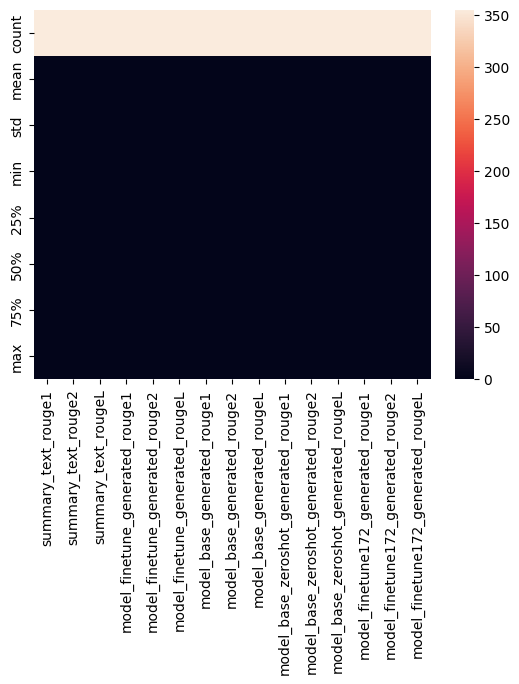

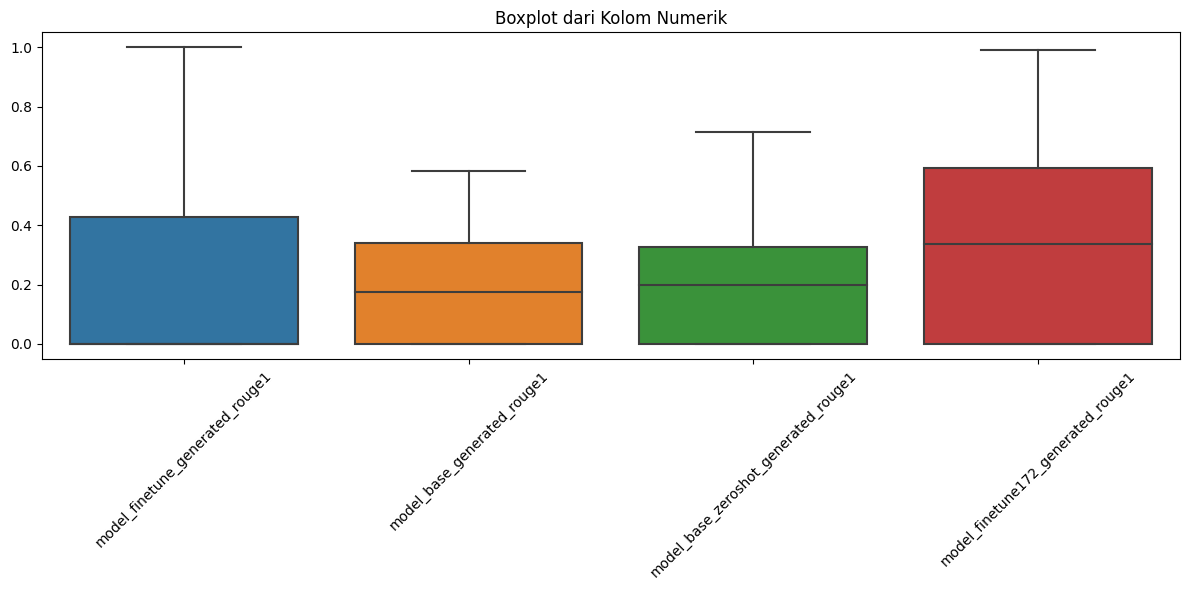

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['model_finetune_generated_rouge1', 'model_base_generated_rouge1', 'model_base_zeroshot_generated_rouge1', 'model_finetune172_generated_rouge1']].select_dtypes(include='number'))  # hanya kolom numerik
plt.xticks(rotation=45)
plt.title("Boxplot dari Kolom Numerik")
plt.tight_layout()
plt.show()


In [81]:
df[['model_finetune_generated_rouge1', 'model_base_generated_rouge1']]

,model_finetune_generated_rouge1,model_base_generated_rouge1
0,0.447761,0.402778
1,0.909091,0.335766
2,0.362069,0.363636
3,0.333333,0.402878
4,0.643478,0.312057
...,...,...
350,0.000000,0.000000
351,0.000000,0.084211
352,0.201681,0.283688
353,0.346154,0.000000
